![bike-img](https://kaggle2.blob.core.windows.net/competitions/kaggle/3948/logos/front_page.png)
Data Fields
from [Bike Sharing Demand | Kaggle](https://www.kaggle.com/c/bike-sharing-demand/data)


### Description
* datetime - hourly date + timestamp  
* season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals

### Evaluation
Submissions are evaluated one the Root Mean Squared Logarithmic Error (RMSLE). 

분류와 회귀중 회귀와 관련 된 문제
=> 자전거 대여량을 예측하는 문제이기 때문에

In [48]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [49]:
train = pd.read_csv("E:/bike-sharing-demand/train.csv", parse_dates=["datetime"])
test = pd.read_csv("E:/bike-sharing-demand/test.csv", parse_dates=["datetime"])

In [50]:
train.shape

(10886, 12)

In [51]:
test.shape

(6493, 9)

In [52]:
# train.columns
# train.dtypes
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [53]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [54]:
train.head(30)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [55]:
train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [56]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [57]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

<AxesSubplot:>

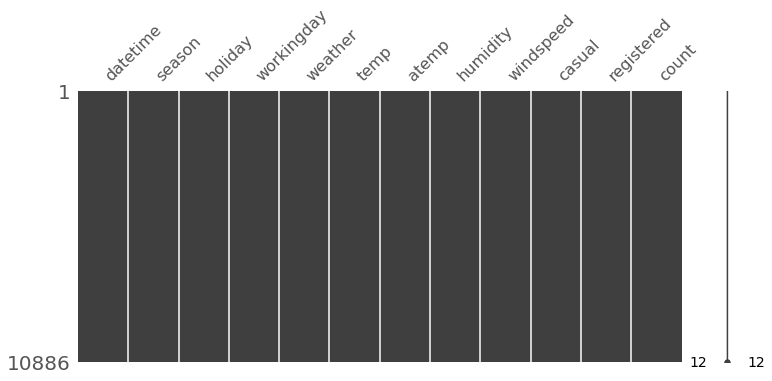

In [58]:
import missingno as msno

msno.matrix(train, figsize=(12,5))

In [59]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train.shape

(10886, 16)

In [60]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


[Text(0.5, 0, 'hour'), Text(0.5, 1.0, 'hourly rental volume')]

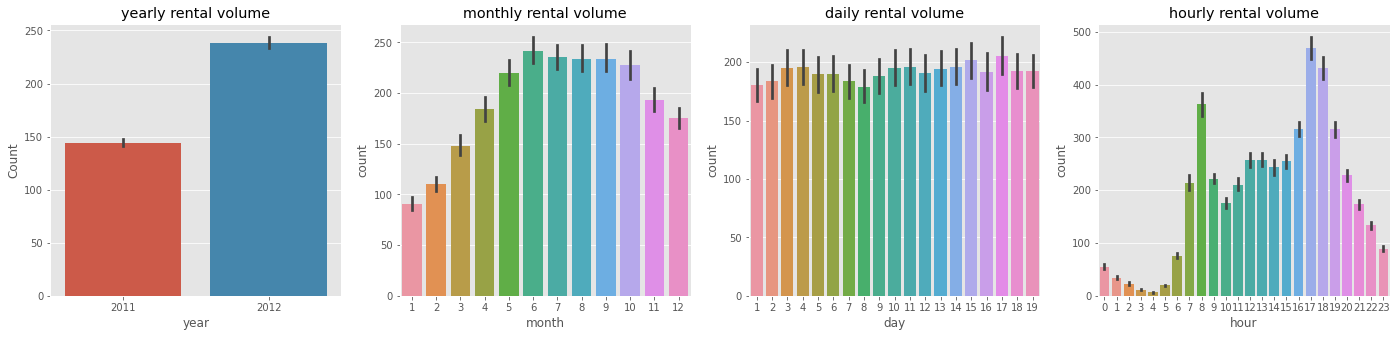

In [61]:
figure, ((ax1,ax2,ax3,ax4)) = plt.subplots(nrows=1, ncols=4)
figure.set_size_inches(24,5)

sns.barplot(data=train, x="year", y="count", ax=ax1)
sns.barplot(data=train, x="month", y="count", ax=ax2)
sns.barplot(data=train, x="day", y="count", ax=ax3)
sns.barplot(data=train, x="hour", y="count", ax=ax4)


ax1.set(ylabel='Count',title="yearly rental volume")
ax2.set(xlabel='month',title="monthly rental volume")
ax3.set(xlabel='day', title="daily rental volume")
ax4.set(xlabel='hour', title="hourly rental volume")

* 연도별 대여량은 2011년 보다 2012년이 더 많다.
* 월별 대여량은 6월에 가장 많고 7~10월도 대여량이 많다. 그리고 1월에 가장 적다.
* 일별대여량은 1일부터 19일까지만 있고 나머지 날짜는 test.csv에 있다. 그래서 이 데이터는 피처로 사용하면 안 된다.
* 시간 대 대여량을 보면 출퇴근 시간에 대여량이 많은 것 같다. 하지만 주말과 나누어 볼 필요가 있을 것 같다.

[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'workingday rental volume')]

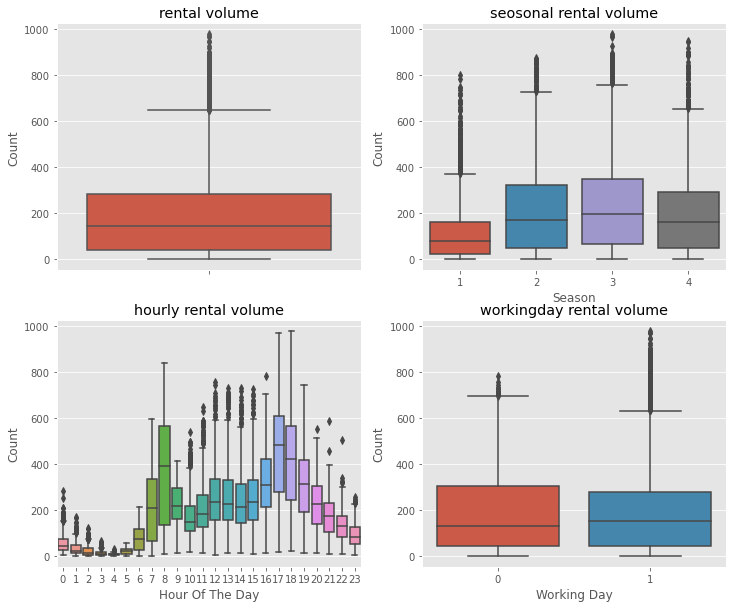

In [62]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sns.boxplot(data=train,y="count",orient="v",ax=axes[0][0])
sns.boxplot(data=train,y="count",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=train,y="count",x="hour",orient="v",ax=axes[1][0])
sns.boxplot(data=train,y="count",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="rental volume")
axes[0][1].set(xlabel='Season', ylabel='Count',title="seosonal rental volume")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="hourly rental volume")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="workingday rental volume")

In [63]:
# 요일별 확인
train["dayofweek"] = train["datetime"].dt.dayofweek
train.shape

(10886, 17)

In [64]:
train["dayofweek"].value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

<AxesSubplot:xlabel='dayofweek', ylabel='count'>

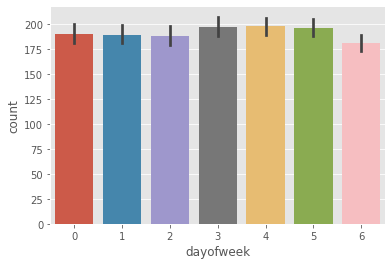

In [65]:
sns.barplot(data = train, x = 'dayofweek', y = 'count')

In [66]:
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["hour"] = test["datetime"].dt.hour
test["dayofweek"] = test["datetime"].dt.dayofweek

<AxesSubplot:xlabel='hour', ylabel='count'>

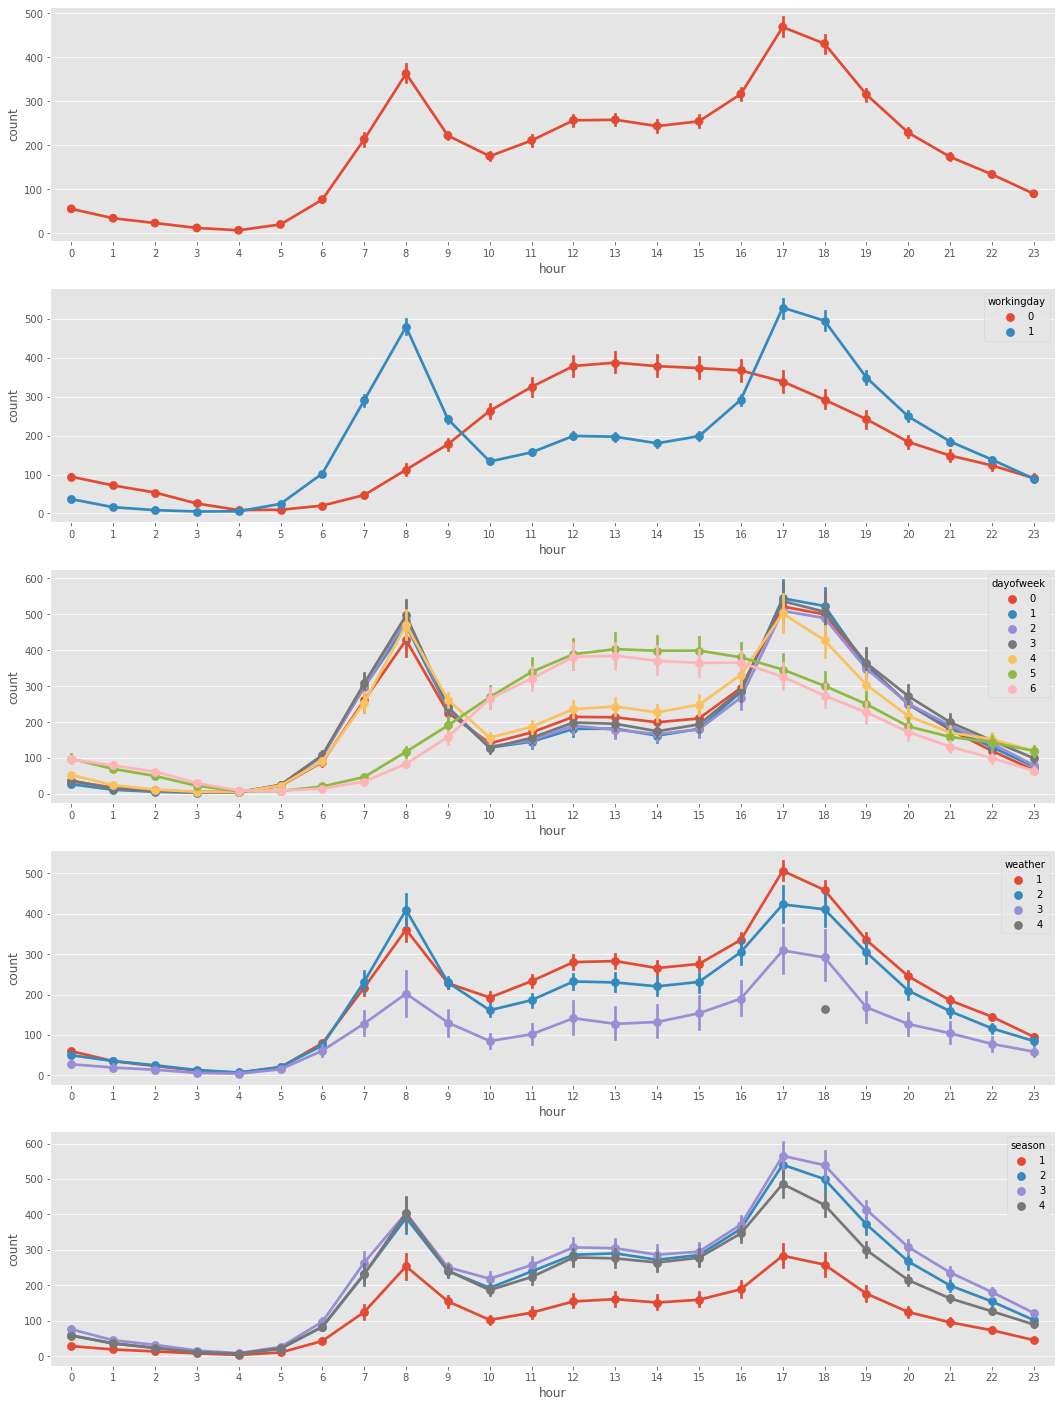

In [67]:
fig,(ax1,ax2,ax3,ax4,ax5)= plt.subplots(nrows=5)
fig.set_size_inches(18,25)

sns.pointplot(data=train, x="hour", y="count", ax=ax1)

sns.pointplot(data=train, x="hour", y="count", hue="workingday", ax=ax2)

sns.pointplot(data=train, x="hour", y="count", hue="dayofweek", ax=ax3)

sns.pointplot(data=train, x="hour", y="count", hue="weather", ax=ax4)

sns.pointplot(data=train, x="hour", y="count", hue="season", ax=ax5)

In [68]:
def new_season(month):
    if month in [3, 4, 5]:
        return 1
    elif month in [6, 7, 8]:
        return 2
    elif month in [9, 10, 11]:
        return 3
    else:
        return 4

In [72]:
train['season'] = train['month'].apply(new_season)
train[['month','season']]

,month,season
0,1,4
1,1,4
2,1,4
3,1,4
4,1,4
...,...,...
10881,12,4
10882,12,4
10883,12,4
10884,12,4


In [73]:
test['season'] = train['month'].apply(new_season)
test[['month','season']]

,month,season
0,1,4
1,1,4
2,1,4
3,1,4
4,1,4
...,...,...
6488,12,1
6489,12,1
6490,12,1
6491,12,1


<AxesSubplot:xlabel='season', ylabel='count'>

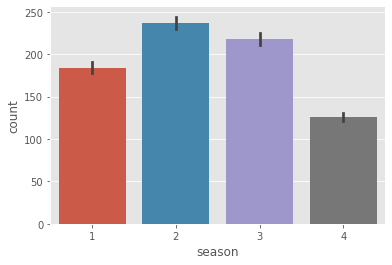

In [74]:
sns.barplot(data = train, x = 'season', y = 'count')

<AxesSubplot:xlabel='weather', ylabel='count'>

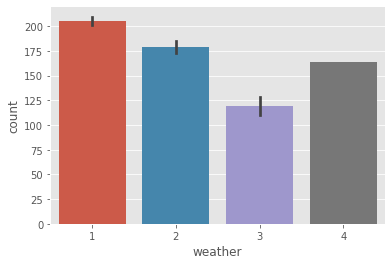

In [76]:
sns.barplot(data = train, x = 'weather', y = 'count')

In [78]:
train[train['weather'] == 4 ]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
5631,2012-01-09 18:00:00,4,0,1,4,8.2,11.365,86,6.0032,6,158,164,2012,1,9,18,0


In [80]:
train.loc[train['weather']==4, 'weather'] = 3
train[train['weather']==4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek


<AxesSubplot:xlabel='weather', ylabel='count'>

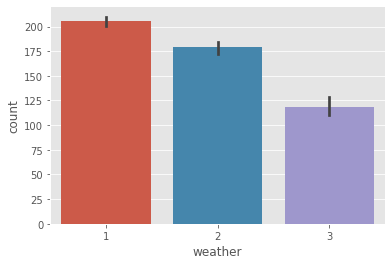

In [81]:
sns.barplot(data = train, x = 'weather', y = 'count')

In [82]:
test.loc[test['weather']==4, 'weather'] = 3
test[test['weather']==4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,dayofweek


<AxesSubplot:xlabel='temp', ylabel='count'>

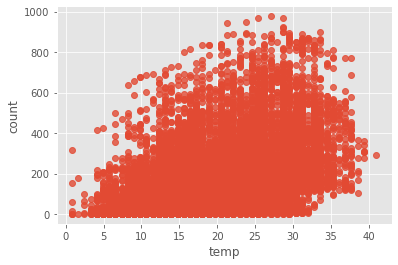

In [85]:
sns.regplot(data = train, x = 'temp', y = 'count', fit_reg=False)

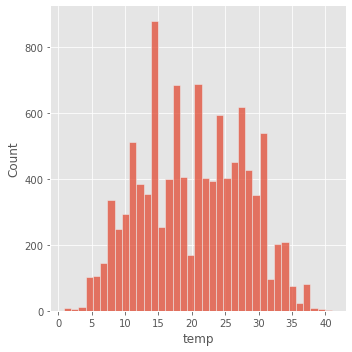

In [89]:
sns.displot(train['temp'])

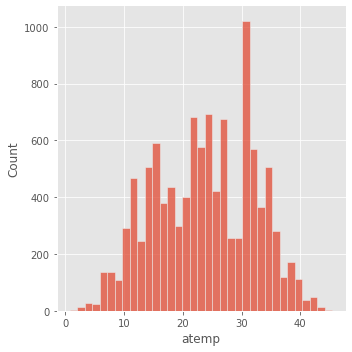

In [90]:
sns.displot(train['atemp'])

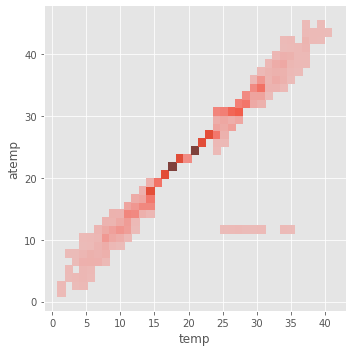

In [91]:
sns.displot(data=train, x='temp', y='atemp')

In [92]:
corr = train.corr()
corr['temp']

season       -0.434241
holiday       0.000295
workingday    0.029966
weather      -0.054838
temp          1.000000
atemp         0.984948
humidity     -0.064949
windspeed    -0.017852
casual        0.467097
registered    0.318571
count         0.394454
year          0.061226
month         0.257589
day           0.015551
hour          0.145430
dayofweek    -0.038466
Name: temp, dtype: float64

<AxesSubplot:xlabel='humidity', ylabel='count'>

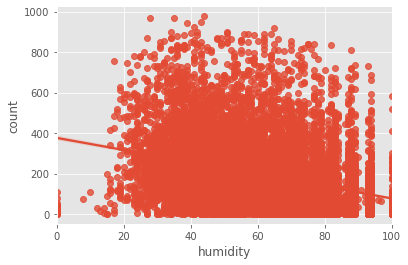

In [94]:
sns.regplot(data=train, x='humidity', y='count')

In [95]:
corr['count']

season       -0.118785
holiday      -0.005393
workingday    0.011594
weather      -0.128694
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
year          0.260403
month         0.166862
day           0.019826
hour          0.400601
dayofweek    -0.002283
Name: count, dtype: float64

<AxesSubplot:xlabel='windspeed', ylabel='count'>

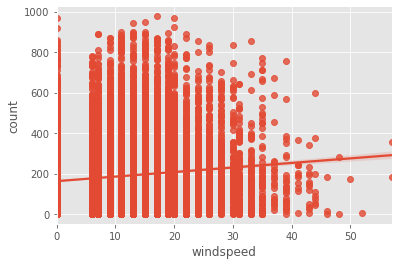

In [99]:
sns.regplot(data=train, x='windspeed', y='count')

In [100]:
train['windspeed'].value_counts()

0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
50.0021       1
51.9987       1
Name: windspeed, dtype: int64

In [101]:
windspeed_0 = train[train['windspeed']==0]
print(windspeed_0.shape)
windspeed_0.head()

(1313, 17)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


In [102]:
windspeed_not0 = train[train['windspeed'] != 0]
print(windspeed_not0.shape)
windspeed_not0.head()

(9573, 17)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
5,2011-01-01 05:00:00,4,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5,5
10,2011-01-01 10:00:00,4,0,0,1,15.58,19.695,76,16.9979,12,24,36,2011,1,1,10,5
11,2011-01-01 11:00:00,4,0,0,1,14.76,16.665,81,19.0012,26,30,56,2011,1,1,11,5
12,2011-01-01 12:00:00,4,0,0,1,17.22,21.210,77,19.0012,29,55,84,2011,1,1,12,5
13,2011-01-01 13:00:00,4,0,0,2,18.86,22.725,72,19.9995,47,47,94,2011,1,1,13,5


In [110]:
ws0 = windspeed_0[['season', 'workingday', 'weather', 'temp', 'humidity', 'year', 'month', 'hour', 'dayofweek']]
print(ws0.shape)
ws0.head()

(1313, 9)


,season,workingday,weather,temp,humidity,year,month,hour,dayofweek
0,4,0,1,9.84,81,2011,1,0,5
1,4,0,1,9.02,80,2011,1,1,5
2,4,0,1,9.02,80,2011,1,2,5
3,4,0,1,9.84,75,2011,1,3,5
4,4,0,1,9.84,75,2011,1,4,5


In [111]:
wsnot0 = windspeed_not0[['season', 'workingday', 'weather', 'temp', 'humidity', 'year', 'month', 'hour', 'dayofweek']]
print(wsnot0.shape)
wsnot0.head()

(9573, 9)


,season,workingday,weather,temp,humidity,year,month,hour,dayofweek
5,4,0,2,9.84,75,2011,1,5,5
10,4,0,1,15.58,76,2011,1,10,5
11,4,0,1,14.76,81,2011,1,11,5
12,4,0,1,17.22,77,2011,1,12,5
13,4,0,2,18.86,72,2011,1,13,5


In [112]:
ws = windspeed_not0['windspeed']
print(ws.shape)
ws.head()

(9573,)


5      6.0032
10    16.9979
11    19.0012
12    19.0012
13    19.9995
Name: windspeed, dtype: float64

In [113]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model

RandomForestRegressor()

In [115]:
model.fit(wsnot0, ws)

RandomForestRegressor()

In [117]:
windspeed_0['windspeed'] = model.predict(ws0)

<ipython-input-117-7183f7cf65f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  windspeed_0['windspeed'] = model.predict(ws0)


In [119]:
windspeed = pd.concat([windspeed_0, windspeed_not0], axis=0)['windspeed']
train['windspeed'] = windspeed

In [120]:
test['windspeed'].value_counts()

0.0000     867
11.0014    638
8.9981     618
12.9980    615
7.0015     583
6.0032     553
15.0013    552
16.9979    471
19.0012    372
19.9995    316
22.0028    230
23.9994    186
26.0027    146
27.9993    109
30.0026     65
31.0009     57
32.9975     32
35.0008     26
39.0007     17
36.9974     17
40.9973     12
43.9989      3
46.0022      2
43.0006      2
54.0020      2
50.0021      1
55.9986      1
Name: windspeed, dtype: int64

In [121]:
windspeed_0_t = test[test['windspeed']==0]
windspeed_not0_t = test[test['windspeed']!=0]
ws0_t = windspeed_0_t[['season', 'workingday', 'weather', 'temp', 'humidity', 'year', 'month', 'hour', 'dayofweek']]
wsnot0_t = windspeed_not0_t[['season', 'workingday', 'weather', 'temp', 'humidity', 'year', 'month', 'hour', 'dayofweek']]
ws_t = windspeed_not0_t['windspeed']
model.fit(wsnot0_t, ws_t)

RandomForestRegressor()

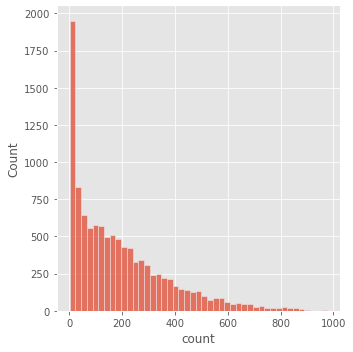

In [122]:
sns.displot(train['count'])

In [123]:
train['log_count'] = np.log(train['count']+1)
train[['count', 'log_count']].head()

,count,log_count
0,16,2.833213
1,40,3.713572
2,32,3.496508
3,13,2.639057
4,1,0.693147


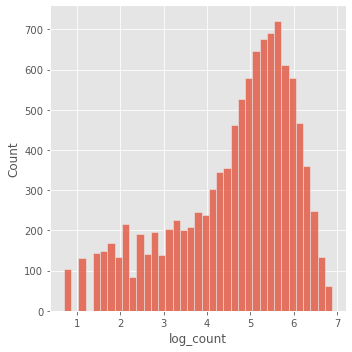

In [124]:
sns.displot(train['log_count'])

In [125]:
features = ['year', 'month', 'hour', 'season', 'workingday', 'weather', 'temp', 'humidity', 'windspeed', 'dayofweek']
features

['year',
 'month',
 'hour',
 'season',
 'workingday',
 'weather',
 'temp',
 'humidity',
 'windspeed',
 'dayofweek']

In [126]:
x_train = train[features]
print(x_train.shape)
x_train.head()

(10886, 10)


,year,month,hour,season,workingday,weather,temp,humidity,windspeed,dayofweek
0,2011,1,0,4,0,1,9.84,81,8.701558,5
1,2011,1,1,4,0,1,9.02,80,8.731105,5
2,2011,1,2,4,0,1,9.02,80,8.911000,5
3,2011,1,3,4,0,1,9.84,75,7.631836,5
4,2011,1,4,4,0,1,9.84,75,7.391842,5


In [127]:
x_test = test[features]
print(x_test.shape)
x_test.head()

(6493, 10)


,year,month,hour,season,workingday,weather,temp,humidity,windspeed,dayofweek
0,2011,1,0,4,1,1,10.66,56,26.0027,3
1,2011,1,1,4,1,1,10.66,56,0.0000,3
2,2011,1,2,4,1,1,10.66,56,0.0000,3
3,2011,1,3,4,1,1,10.66,56,11.0014,3
4,2011,1,4,4,1,1,10.66,56,11.0014,3


In [128]:
y_train = train['log_count']
print(y_train.shape)
y_train.head()

(10886,)


0    2.833213
1    3.713572
2    3.496508
3    2.639057
4    0.693147
Name: log_count, dtype: float64

In [130]:
def rmse(p,a):
    differnce = p - a
    squared = differnce ** 2
    mean = squared.mean()
    score = np.sqrt(mean)
    return score

In [132]:
from sklearn.metrics import make_scorer
rmse_scorer = make_scorer(rmse, greater_is_better = False)
rmse_scorer

make_scorer(rmse, greater_is_better=False)

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth' : [10, 30, 50, 70, 90],'max_features' : [0.1, 0.3, 0.5, 0.7, 0.9]}
GS = GridSearchCV(model, param_grid = parameters, cv=20, scoring=rmse_scorer)
GS.fit(x_train, y_train)

In [139]:
model = RandomForestRegressor(n_estimators=100, max_depth=30, max_features=0.9, n_jobs=-1, random_state=7)
model

RandomForestRegressor(max_depth=30, max_features=0.9, n_jobs=-1, random_state=7)

In [140]:
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=30, max_features=0.9, n_jobs=-1, random_state=7)

In [142]:
log_predictions = model.predict(x_test)
print(log_predictions.shape)
log_predictions[:5]

(6493,)


array([2.42954935, 1.78486964, 1.45689053, 1.37986865, 1.33893649])

In [148]:
predictions = np.exp(log_predictions) - 1
print(predictions.shape)
predictions[:5]

(6493,)


array([10.35376434,  4.9588031 ,  3.29259107,  2.97437958,  2.81498409])

In [154]:
submit = pd.read_csv('sampleSubmission.csv')
submit['count'] = predictions
submit.to_csv('results.csv', index = False)